In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/saurabhtayal/diabetic-patients-readmission-prediction?select=diabetic_data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rashimakharia
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saurabhtayal/diabetic-patients-readmission-prediction


100%|██████████| 3.40M/3.40M [00:00<00:00, 5.23MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv("/content/diabetic-patients-readmission-prediction/diabetic_data.csv")

In [ ]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:

import pandas as pd
data = pd.read_csv("/content/diabetic-patients-readmission-prediction/diabetic_data.csv")

# Now you can run this cell to check for missing values
print(data.isnull().sum())

# Fill or drop missing values as appropriate
data.fillna(method='ffill', inplace=True)  # Forward fill as an example

# Remove duplicates
data.drop_duplicates(inplace=True)

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

<ipython-input-2-424e53782a27>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [ ]:
# Convert categorical variables using one-hot encoding or label encoding
data = pd.get_dummies(data, columns=['gender', 'admission_type_id', 'diag_1'], drop_first=True)

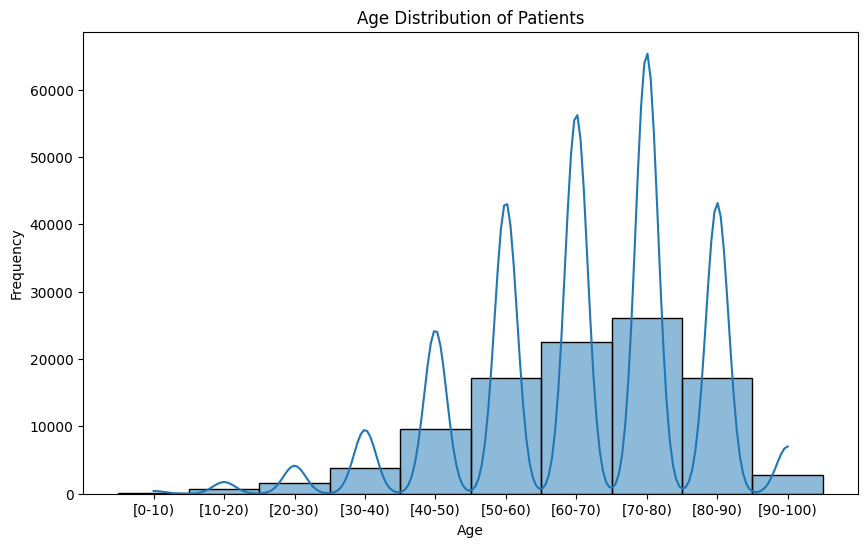

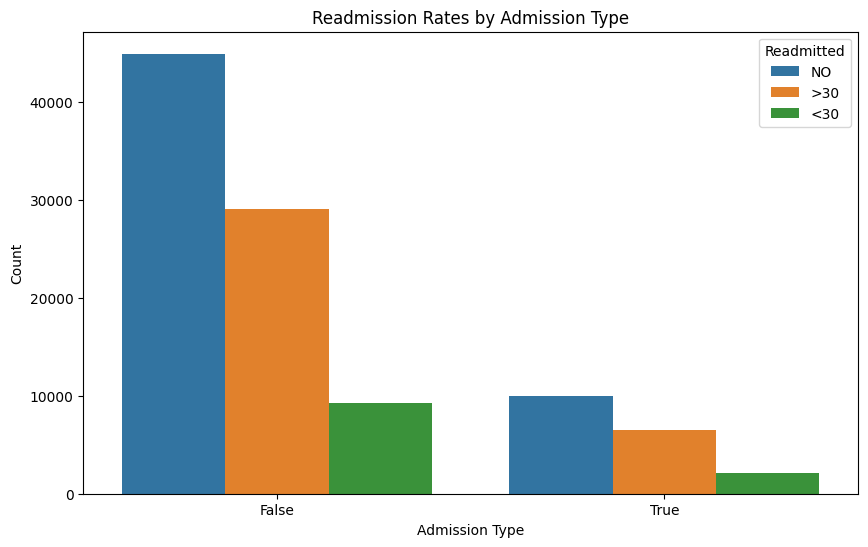

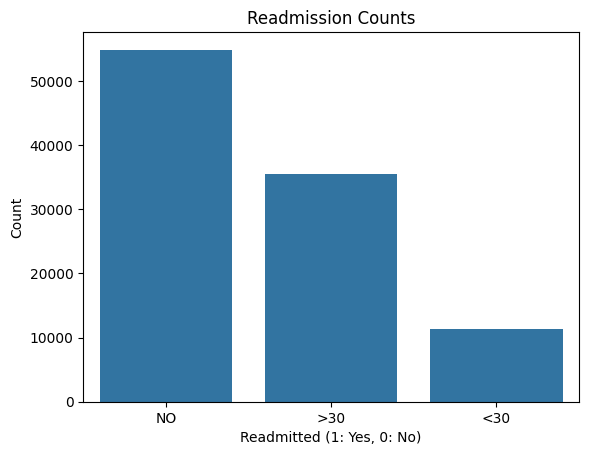

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyze readmission rates by admission type
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id_2', hue='readmitted', data=data)
plt.title('Readmission Rates by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()

# Visualize readmission rates
sns.countplot(x='readmitted', data=data)
plt.title('Readmission Counts')
plt.xlabel('Readmitted (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Example: create a feature for time since last admission

data['time_since_last_admission'] = data['discharge_disposition_id'] * data['time_in_hospital']

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert 'age' column to numerical representation
# Assuming age ranges are like [0-10), [10-20), etc.
# We'll take the midpoint of each range as the numerical value.
def age_to_midpoint(age_range):
    # Check if age_range is a string before slicing
    if isinstance(age_range, str):
        try:
            start, end = map(int, age_range[1:-1].split('-'))
            return (start + end) / 2
        except ValueError:
            # Handle cases where age range format is unexpected
            return float('nan')  # Or choose another appropriate handling strategy
    else:
        # If age_range is already a number (likely from previous processing), return it as is
        return age_range

data['age'] = data['age'].apply(age_to_midpoint)

# Now apply StandardScaler
scaler = StandardScaler()
data[['age', 'time_in_hospital']] = scaler.fit_transform(data[['age', 'time_in_hospital']])

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('readmitted', axis=1)  # Features
y = data['readmitted']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# ... (Your previous code for data loading and preprocessing) ...

# Identify categorical features
categorical_features = ['race',  'admission_type_id_2', 'admission_source_id',
                       'discharge_disposition_id', 'medical_specialty',
                       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
                       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                       'miglitol', 'troglitazone', 'tolazamide', 'examide',
                       'citoglipton', 'insulin', 'glyburide-metformin',
                       'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone', 'metformin-pioglitazone',
                       'change', 'diabetesMed']  # Add all your categorical columns here

# Ensure all categorical features are present in the DataFrame
# Print available columns for debugging
print(data.columns)

# Check for case sensitivity and typos
for feature in categorical_features:
    if feature not in data.columns:
        print(f"Warning: Feature '{feature}' not found in DataFrame columns.")
        # If you find a mismatch, correct the feature name in categorical_features
        # For example, if 'Gender' is present instead of 'gender':
        # categorical_features[categorical_features.index(feature)] = 'Gender'

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'time_in_hospital']),  # Numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # Categorical features
    ])

# Create a pipeline to chain preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data into training and testing sets
X = data.drop('readmitted', axis=1)
y = data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (including preprocessing and model training)
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Index(['encounter_id', 'patient_nbr', 'race', 'age', 'weight',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty',
       ...
       'diag_1_V56', 'diag_1_V57', 'diag_1_V58', 'diag_1_V60', 'diag_1_V63',
       'diag_1_V66', 'diag_1_V67', 'diag_1_V70', 'diag_1_V71',
       'time_since_last_admission'],
      dtype='object', length=773)
              precision    recall  f1-score   support

         <30       0.29      0.01      0.02      2285
         >30       0.46      0.30      0.36      7117
          NO       0.58      0.83      0.68     10952

    accuracy                           0.55     20354
   macro avg       0.44      0.38      0.36     20354
weighted avg       0.50      0.55      0.50     20354

[[  27  644 1614]
 [  36 2134 4947]
 [  29 1881 9042]]


              precision    recall  f1-score   support

         <30       0.29      0.01      0.02      2285
         >30       0.46      0.30      0.36      7117
          NO       0.58      0.83      0.68     10952

    accuracy                           0.55     20354
   macro avg       0.44      0.38      0.36     20354
weighted avg       0.50      0.55      0.50     20354



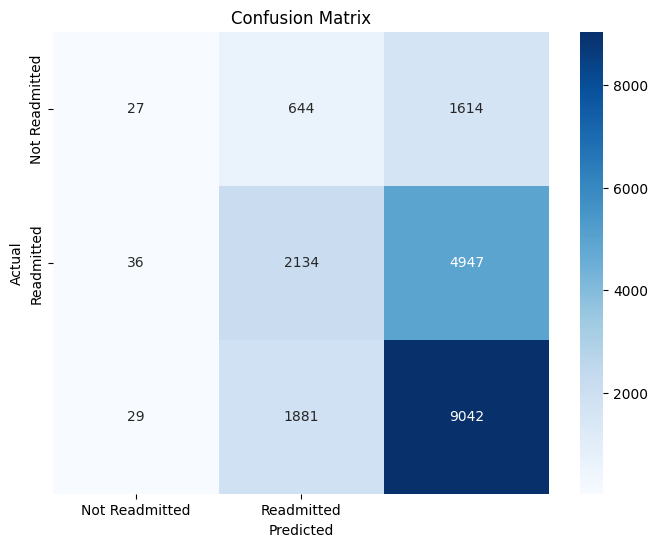

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()